In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Paths
ARCHIVE_DIR = r"D:\Visual Studio practice\emotion_detection\archive"
TRAIN_DIR = os.path.join(ARCHIVE_DIR, "train")
TEST_DIR = os.path.join(ARCHIVE_DIR, "test")
DATA_DIR = "../data"
os.makedirs(DATA_DIR, exist_ok=True)

print("Train dir:", TRAIN_DIR)
print("Test dir:", TEST_DIR)

# Quick check
assert os.path.exists(TRAIN_DIR), f"Train folder not found at {TRAIN_DIR}"
assert os.path.exists(TEST_DIR), f"Test folder not found at {TEST_DIR}"
print("✅ Archive folder structure is correct.")

Train dir: D:\Visual Studio practice\emotion_detection\archive\train
Test dir: D:\Visual Studio practice\emotion_detection\archive\test
✅ Archive folder structure is correct.


In [2]:
import cv2
import numpy as np
from tqdm import tqdm

def load_images_from_folder(folder):
    images, labels = [], []
    for label in sorted(os.listdir(folder)):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):
            for file in tqdm(os.listdir(label_path), desc=f"Loading {label}"):
                img_path = os.path.join(label_path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    # Resize to FER-2013 standard size
                    img = cv2.resize(img, (48, 48))
                    # Normalize to [0,1]
                    images.append(img.astype(np.float32) / 255.0)
                    # Use folder name as label (string for now)
                    labels.append(label)
    return np.array(images)[..., np.newaxis], np.array(labels)

# Load train and test sets
train_x, train_y = load_images_from_folder(TRAIN_DIR)
test_x, test_y = load_images_from_folder(TEST_DIR)

print("Train set:", train_x.shape, train_y.shape)
print("Test set:", test_x.shape, test_y.shape)

Loading surprise: 100%|██████████| 831/831 [00:00<00:00, 1323.33it/s]

Train set: (28709, 48, 48, 1) (28709,)
Test set: (7178, 48, 48, 1) (7178,)


In [4]:
# Create a mapping from string labels to integers
unique_labels = sorted(set(train_y))
label_map = {label: idx for idx, label in enumerate(unique_labels)}
print("Label map:", label_map)

# Apply mapping
train_y_int = np.array([label_map[l] for l in train_y])
test_y_int = np.array([label_map[l] for l in test_y])

print("Train labels encoded:", train_y_int[:10])
print("Test labels encoded:", test_y_int[:10])

Label map: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Train labels encoded: [0 0 0 0 0 0 0 0 0 0]
Test labels encoded: [0 0 0 0 0 0 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y_int, val_y_int = train_test_split(
    train_x, train_y_int,
    test_size=0.1,
    random_state=42,
    stratify=train_y_int
)

print("Train:", train_x.shape, train_y_int.shape)
print("Val:", val_x.shape, val_y_int.shape)
print("Test:", test_x.shape, test_y_int.shape)

Train: (25838, 48, 48, 1) (25838,)
Val: (2871, 48, 48, 1) (2871,)
Test: (7178, 48, 48, 1) (7178,)


In [6]:
# Save preprocessed arrays for future use
np.save(os.path.join(DATA_DIR, "train_x.npy"), train_x)
np.save(os.path.join(DATA_DIR, "train_y.npy"), train_y_int)
np.save(os.path.join(DATA_DIR, "val_x.npy"), val_x)
np.save(os.path.join(DATA_DIR, "val_y.npy"), val_y_int)
np.save(os.path.join(DATA_DIR, "test_x.npy"), test_x)
np.save(os.path.join(DATA_DIR, "test_y.npy"), test_y_int)

print("✅ Saved preprocessed arrays to:", DATA_DIR)

✅ Saved preprocessed arrays to: ../data


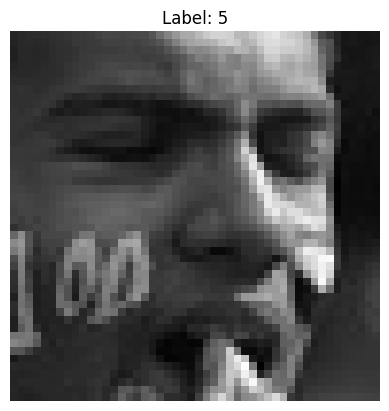

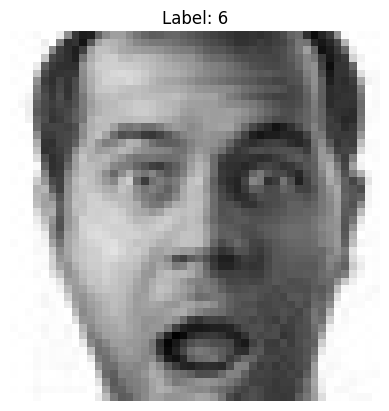

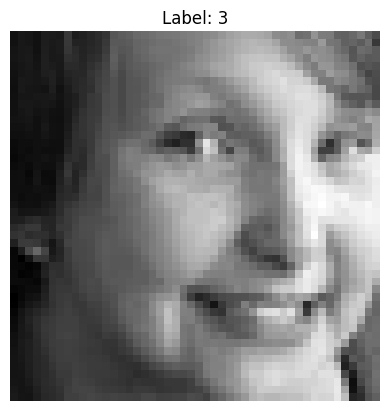

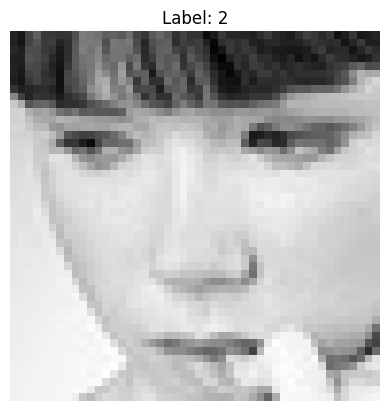

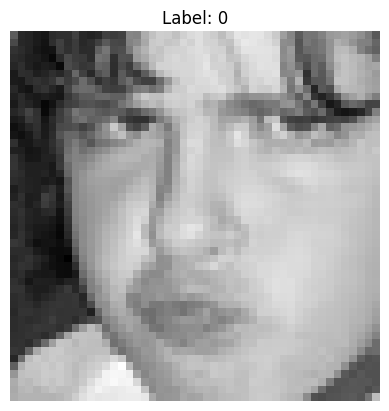

In [7]:
import matplotlib.pyplot as plt

# Show 5 random samples from training set
for i in range(5):
    idx = np.random.randint(0, len(train_x))
    plt.imshow(train_x[idx].squeeze(), cmap="gray")
    plt.title(f"Label: {train_y_int[idx]}")
    plt.axis("off")
    plt.show()